# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

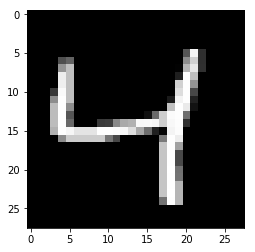

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [12]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]
learning_rate = 0.001

# Input and target placeholders
inputs_ = tf.placeholder(dtype = tf.float32,shape = (None, image_size),name='inputs')
targets_ = tf.placeholder(dtype = tf.float32,shape = (None, image_size),name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size,activation=None )#don't use an activation here because want to pass the logits through the loss function later
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits,name='outputs')#allows us to reconstruct the images, puts values between 0 and 1

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)#gets mean of the loss across all images in a mini-batch

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

## Training

In [13]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}#note that inputs and targets are the same
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6947
Epoch: 1/20... Training loss: 0.6904
Epoch: 1/20... Training loss: 0.6856
Epoch: 1/20... Training loss: 0.6799
Epoch: 1/20... Training loss: 0.6735
Epoch: 1/20... Training loss: 0.6652
Epoch: 1/20... Training loss: 0.6573
Epoch: 1/20... Training loss: 0.6470
Epoch: 1/20... Training loss: 0.6345
Epoch: 1/20... Training loss: 0.6216
Epoch: 1/20... Training loss: 0.6085
Epoch: 1/20... Training loss: 0.5951
Epoch: 1/20... Training loss: 0.5762
Epoch: 1/20... Training loss: 0.5615
Epoch: 1/20... Training loss: 0.5454
Epoch: 1/20... Training loss: 0.5271
Epoch: 1/20... Training loss: 0.5056
Epoch: 1/20... Training loss: 0.4903
Epoch: 1/20... Training loss: 0.4689
Epoch: 1/20... Training loss: 0.4559
Epoch: 1/20... Training loss: 0.4371
Epoch: 1/20... Training loss: 0.4173
Epoch: 1/20... Training loss: 0.4031
Epoch: 1/20... Training loss: 0.3926
Epoch: 1/20... Training loss: 0.3855
Epoch: 1/20... Training loss: 0.3680
Epoch: 1/20... Training loss: 0.3636
E

Epoch: 1/20... Training loss: 0.2005
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1886
E

Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1629
Epoch: 2/20... Training loss: 0.1650
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1534
E

Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1325
E

Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1235
E

Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1205
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1185
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1089
E

Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1104
E

Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.0969
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1049
E

Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.0951
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1025
E

Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0995
E

Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.1001
E

Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.1015
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0972
E

Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0879
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0989
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0884
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.1011
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0868
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0996
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0886
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0893
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0883
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0877
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0985
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

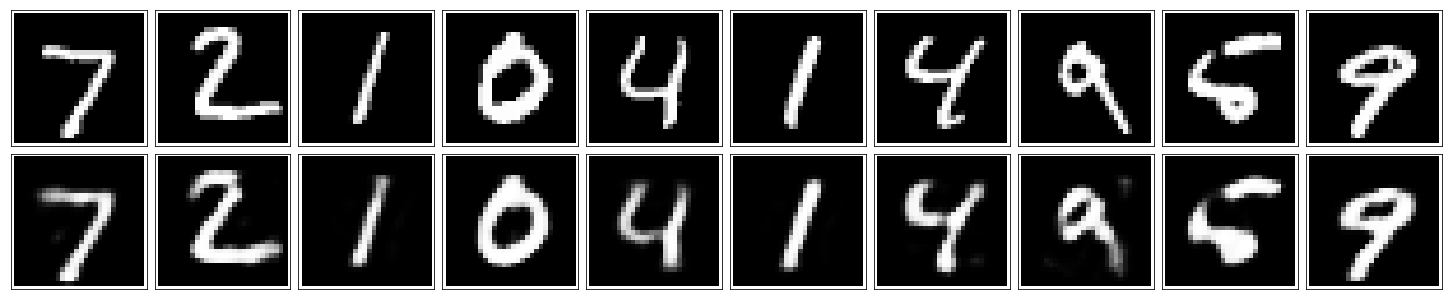

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [16]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.